This script performs the training of a network after the dataset has been constructed. Three modules are used in this training:

1. **input_data**: This module loads in the training data that was created, and prepares it so that it can be fed into the neural network for training.
2. **models**: this module contains different types of neural network architectures. One can choose a model from this script and train it.
3. **training_utilities**: this module contains functions to construct models, set up diagnostic files, and perform the training on the model.

First, we import these modules

In [1]:
from input_data import *
from models import *
from training_utilities import *

Using TensorFlow backend.


Next, we need to provide parameter information based on the data and model we're using.

**parent_dir**: This is the path to the "stem-learning" code

**data_dir**: This is the path to the data that we created in the preprocessing section

**sess_name**: we will create a folder in the "results" directory called session_name, where all the output will be stored

**N**: This is the pixel width/height of the input images (note we're assuming a square image)

**k_fac**: this is a factor that describes how many channels we want per layer in our FCNs. Whatever the default value is per layer, it is multiplied by k_fac.

**nb_classes**: this is the number of labels that we are learning at once. For example, if our data is just the "2Te" labels, then nb_classes = 2 (2Te and no defect). 

In [2]:
parent_dir = '/home/abid/Dropbox/Research/Clarksearch/stem/stem-learning/'
data_dir   = parent_dir + 'data/WSeTe/simulated/parsed_label_2Te/'
sess_name  = '2Te'
N          = 256
k_fac      = 16
nb_classes = 2

The variables below are then created to locate the directories that we'll be storing our data

In [3]:
from os import makedirs
sess_dir = parent_dir + "results_v2/" + sess_name + "/"
makedirs(sess_dir, exist_ok=True)

model_weights_fn = sess_dir + "weights.h5"
model_fn         = sess_dir + "model.json"
diagnostics_fn   = sess_dir + "diagnostics.dat"

Now we create the model and set up a diagnostics file

In [4]:
model = construct_model(N, k_fac, nb_classes, sess_dir, model_fn, model_weights_fn)
step = setup_diagnostics(diagnostics_fn)

W0106 19:31:39.051264 140624373873536 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0106 19:31:39.063582 140624373873536 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0106 19:31:39.065893 140624373873536 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0106 19:31:39.084205 140624373873536 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W010

creating new session


Finally, we train

training step: 0	training file: train_3.p
	grabbing data
	done
	calculating accuracy
[(14.5, 53.5), (21.0, 125.0), (67.0, 39.5), (73.5, 158.5), (87.5, 71.0), (92.5, 184.5), (87.5, 251.0), (100.0, 127.0), (106.5, 192.5), (119.0, 169.5), (133.0, 129.5), (140.5, 218.5), (158.5, 178.0), (158.5, 242.5), (167.0, 41.5), (185.5, 243.5), (198.5, 11.0), (205.5, 130.0), (245.5, 74.5), (250.0, 174.0)]
[(14.5, 21.0, 67.0, 73.5, 87.5, 92.5, 87.5, 100.0, 106.5, 119.0, 133.0, 140.5, 158.5, 158.5, 167.0, 185.5, 198.5, 205.5, 245.5, 250.0), (53.5, 125.0, 39.5, 158.5, 71.0, 184.5, 251.0, 127.0, 192.5, 169.5, 129.5, 218.5, 178.0, 242.5, 41.5, 243.5, 11.0, 130.0, 74.5, 174.0)]
0
2


ValueError: x and y must be the same size

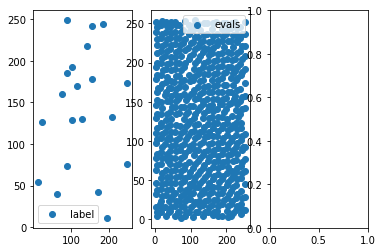

In [5]:
train(step, data_dir, N, nb_classes, model, diagnostics_fn, model_weights_fn)